<a href="https://colab.research.google.com/github/shajeeraza12/Machine-Learning/blob/main/MLT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression as a Neural Network
(partly following deeplearning.ai lab)

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

Key steps:

  -Initialize the parameters of the model

  -Learn the parameters for the model by minimizing the cost  

  -Use the learned parameters to make predictions (on the test set)
  
  -Analyse the results and conclude

## Parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [ ]:
# sigmoid

def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip z to prevent overflow
    s = 1. / (1. + np.exp(-z))
    return s

### Initializing parameters



In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.

    return w, b

### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [ ]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (dim, 1)
    b -- bias, a scalar
    X -- data, shape (number of features, number of examples)
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Returns:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1]  # number of examples

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = -(1. / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1. / m) * np.dot(X, (A - Y).T)  # gradient with respect to w
    db = (1. / m) * np.sum(A - Y)  # gradient with respect to b

    grads = {"dw": dw,
             "db": db}

    return grads, cost

### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of shape (dim, 1)
    b -- bias, a scalar
    X -- data, shape (dim, number of examples)
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """

    costs = []

    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Update rule
        w -= learning_rate * dw
        b -= learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        #if print_cost and i % 100 == 0:
            #print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`.

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of shape (dim, 1)
    b -- bias, a scalar
    X -- data, shape (dim, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]  # number of examples
    Y_prediction = np.zeros((1, m))

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T, X) + b)

    # Convert probabilities A to actual predictions (0 or 1)
    Y_prediction[0] = (A > 0.5).astype(int)  # Vectorized operation

    return Y_prediction


Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, batch_size=64, print_cost=False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (dim, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (dim, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])  # Ensure correct shape for w

    # Gradient descent
    #parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    params_sgd, grads_sgd, costs_sgd = optimize_sgd(X_train, Y_train, num_iterations, learning_rate, batch_size, print_cost)
    #params_adam, grads_adam, costs_adam = optimize_adam(X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    #w = parameters["w"]
    #b = parameters["b"]
    w = params_sgd["w"]
    b = params_sgd["b"]
    #w = params_adam["w"]
    #b = params_adam["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    #print("train accuracy: {:.2f} %".format(train_accuracy))
    #print("test accuracy: {:.2f} %".format(test_accuracy))

    # Prepare the results dictionary
    d = {
        "costs": costs_sgd,
      # "costs": costs_adam,
      # "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    }

    return d

Run the following cell to train your model.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Example path to dataset in Google Drive (adjust as necessary)
file_path = '/content/bioresponse.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Step 2: Split the dataset into features and labels
# Assuming the first column is the target (activity) and the rest are features
X = df.iloc[:, 1:]  # Features (excluding the target column)
y = df.iloc[:, 0]   # Target (activity)

# Step 3: Split the dataset into training and testing sets (75% for training, 25% for testing)
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print (train_set_x.shape)
print (train_set_y.shape)
print (test_set_x.shape)
print (test_set_y.shape)

(2813, 1776)
(2813,)
(938, 1776)
(938,)


In [ ]:
# Assuming train_set_y and test_set_y are Pandas Series
train_set_y = train_set_y.values.reshape(1, -1)  # Convert to NumPy array and reshape to (1, 2813)
test_set_y = test_set_y.values.reshape(1, -1)    # Convert to NumPy array and reshape to (1, 938)

# If train_set_x and test_set_x are also Pandas DataFrames or Series, convert them to NumPy arrays and transpose
train_set_x = train_set_x.to_numpy().T  # Convert to NumPy array and transpose
test_set_x = test_set_x.to_numpy().T    # Convert to NumPy array and transpose

For Learning rate 0.001
train accuracy: 72.52 %
test accuracy: 72.71 %

For Learning rate 0.01
train accuracy: 78.35 %
test accuracy: 75.59 %

For Learning rate 0.05
train accuracy: 82.26 %
test accuracy: 76.97 %

For Learning rate 0.1
train accuracy: 83.33 %
test accuracy: 76.44 %

For Learning rate 0.5
train accuracy: 83.83 %
test accuracy: 72.92 %



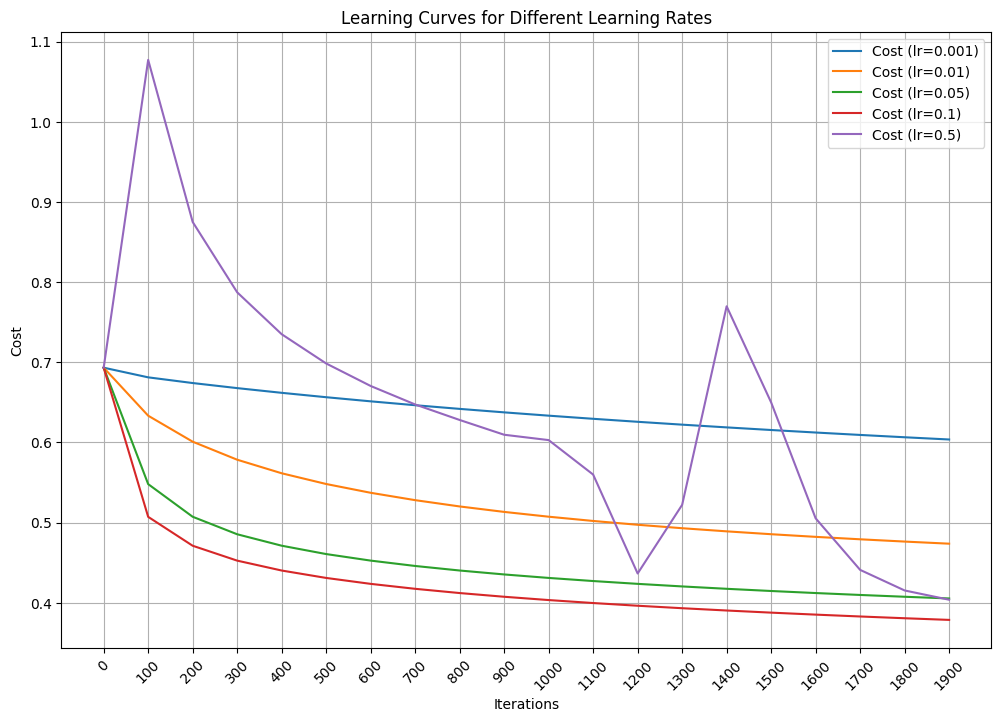

In [ ]:
import matplotlib.pyplot as plt

# Define the learning rates you want to test
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

# Create a figure for the plots
plt.figure(figsize=(12, 8))

# Loop through each learning rate
for lr in learning_rates:
    # Run the model with the current learning rate
    d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=lr, print_cost=False)

    # Print accuracies in the desired format
    print(f"For Learning rate {lr}")
    print(f"train accuracy: {d['train_accuracy']:.2f} %")
    print(f"test accuracy: {d['test_accuracy']:.2f} %\n")  # Added newline for better separation

    # Plot the learning curve (cost)
    plt.plot(d['costs'], label=f'Cost (lr={lr})')

    # Use the training and test accuracy from the model's output
    train_accuracy = d['train_accuracy']
    test_accuracy = d['test_accuracy']

    # Add text annotations for training and test accuracy
    plt.annotate(f'Train Acc: {train_accuracy:.2f}%', xy=(len(d['costs']), train_accuracy),
                 xytext=(len(d['costs']) + 50, train_accuracy),
                 arrowprops=dict(arrowstyle='->', color='blue'), color='blue')
    plt.annotate(f'Test Acc: {test_accuracy:.2f}%', xy=(len(d['costs']), test_accuracy),
                 xytext=(len(d['costs']) + 50, test_accuracy),
                 arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

# Add labels and title
plt.ylabel('Cost')  # Label for the y-axis
plt.xlabel('Iterations')  # Label for the x-axis
plt.title("Learning Curves for Different Learning Rates")  # Title of the plot
plt.xticks(ticks=range(0, len(d['costs'])), labels=[i * 100 for i in range(len(d['costs']))], rotation=45)
plt.grid()  # Optional: Add a grid for better readability
plt.legend()  # Show legend for different learning rates
plt.show()  # Display the plot

# Updated SGD Optimization Function

In [ ]:
def create_mini_batches(X, Y, batch_size):
    m = X.shape[1]
    if batch_size <= 0 or batch_size > m:
        raise ValueError("Invalid batch_size. It must be a positive integer less than or equal to the number of examples.")

    # Shuffle dataset
    permutation = np.random.permutation(m)
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[permutation]

    mini_batches = []
    for i in range(0, m, batch_size):
        X_batch = X_shuffled[:, i:i + batch_size]
        Y_batch = Y_shuffled[i:i + batch_size]
        mini_batches.append((X_batch, Y_batch))
    return mini_batches

In [ ]:
def optimize_sgd(X, Y, num_iterations, learning_rate, batch_size, print_cost=False):
    m = X.shape[1]  # number of examples
    n = X.shape[0]  # number of features
    w = np.zeros((n, 1))  # initialize weights
    b = 0  # initialize bias
    costs = []  # to store the cost at each iteration

    # Ensure Y is a 1D array
    if Y.ndim > 1:
        Y = Y.flatten()  # Convert to 1D array

    for i in range(num_iterations):
        # Shuffle and create mini-batches
        mini_batches = create_mini_batches(X, Y, batch_size)

        # Loop through each mini-batch
        for X_batch, Y_batch in mini_batches:
            batch_m = X_batch.shape[1]  # Number of examples in the batch

            # Forward propagation
            A = sigmoid(np.dot(w.T, X_batch) + b)  # Activation

            # Clip A to avoid log(0) errors
            A = np.clip(A, 1e-8, 1 - 1e-8)

            # Cost computation
            cost = - (1 / batch_m) * np.sum(Y_batch * np.log(A) + (1 - Y_batch) * np.log(1 - A))

            # Backward propagation (gradient calculation)
            dw = (1 / batch_m) * np.dot(X_batch, (A - Y_batch).T)
            db = (1 / batch_m) * np.sum(A - Y_batch)

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)  # Add the last computed cost for monitoring

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

For Learning rate 0.001
train accuracy: 81.94 %
test accuracy: 77.40 %

For Learning rate 0.01
train accuracy: 86.78 %
test accuracy: 75.69 %

For Learning rate 0.05
train accuracy: 90.54 %
test accuracy: 76.12 %

For Learning rate 0.1
train accuracy: 91.72 %
test accuracy: 75.37 %

For Learning rate 0.5
train accuracy: 93.74 %
test accuracy: 72.71 %



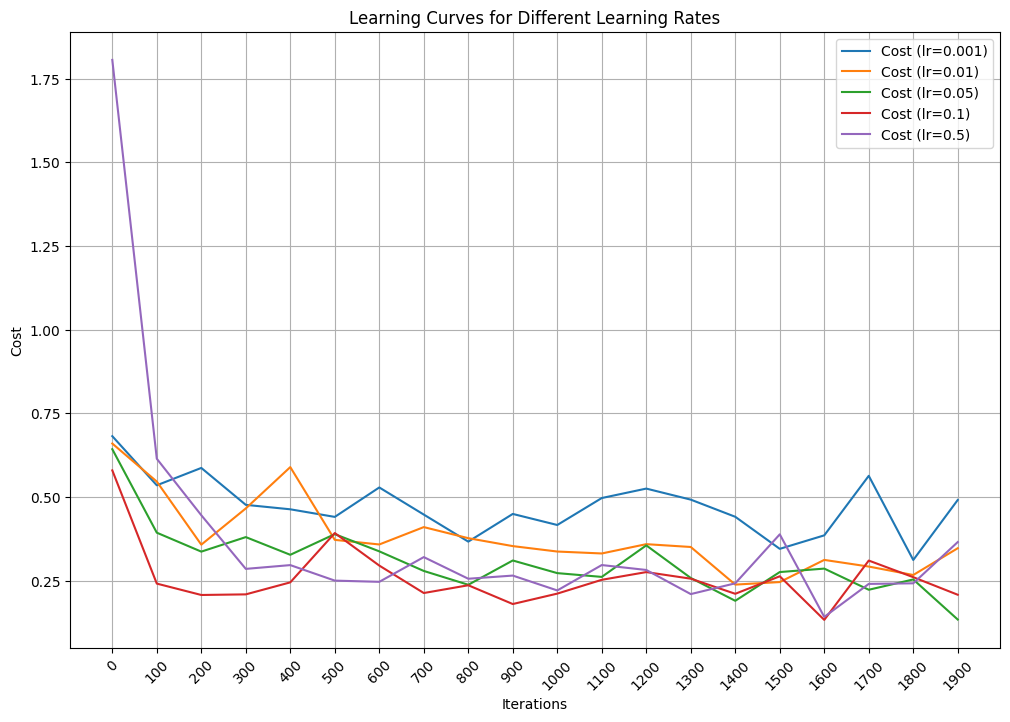

In [ ]:
# Define the learning rates you want to test
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

# Create a figure for the plots
plt.figure(figsize=(12, 8))

# Loop through each learning rate
for lr in learning_rates:
    # Run the model with the current learning rate
    d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=lr, batch_size=64, print_cost=False)

    # Print accuracies in the desired format
    print(f"For Learning rate {lr}")
    print(f"train accuracy: {d['train_accuracy']:.2f} %")
    print(f"test accuracy: {d['test_accuracy']:.2f} %\n")  # Added newline for better separation

    # Plot the learning curve (cost)
    plt.plot(d['costs'], label=f'Cost (lr={lr})')

    # Use the training and test accuracy from the model's output
    train_accuracy = d['train_accuracy']
    test_accuracy = d['test_accuracy']

    # Add text annotations for training and test accuracy
    plt.annotate(f'Train Acc: {train_accuracy:.2f}%', xy=(len(d['costs']), train_accuracy),
                 xytext=(len(d['costs']) + 50, train_accuracy),
                 arrowprops=dict(arrowstyle='->', color='blue'), color='blue')
    plt.annotate(f'Test Acc: {test_accuracy:.2f}%', xy=(len(d['costs']), test_accuracy),
                 xytext=(len(d['costs']) + 50, test_accuracy),
                 arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

# Add labels and title
plt.ylabel('Cost')  # Label for the y-axis
plt.xlabel('Iterations')  # Label for the x-axis
plt.title("Learning Curves for Different Learning Rates")  # Title of the plot
plt.xticks(ticks=range(0, len(d['costs'])), labels=[i * 100 for i in range(len(d['costs']))], rotation=45)
plt.grid()  # Optional: Add a grid for better readability
plt.legend()  # Show legend for different learning rates
plt.show()  # Display the plot

I had to run this code, by dividing it into mini batches, Thats why I am getting this kinf of output. While running it with normal batch size I was getting an error because of RAM shortage and the code used to crash.

# Updated Adam's Optimization Function

In [ ]:
def optimize_adam(X, Y, num_iterations, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8, print_cost=False):
    m = X.shape[1]  # number of examples
    n = X.shape[0]  # number of features
    w = np.zeros((n, 1))  # initialize weights
    b = 0  # initialize bias
    costs = []  # to store the cost at each iteration

    # For Adam optimization
    v_dw = np.zeros((n, 1))  # Initialize first moment vector
    v_db = 0  # Initialize first moment for bias
    s_dw = np.zeros((n, 1))  # Initialize second moment vector
    s_db = 0  # Initialize second moment for bias

    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(w.T, X) + b
        A = sigmoid(z)
        A = np.clip(A, epsilon, 1 - epsilon)  # Clip predictions to prevent log(0) issues
        cost = - (Y * np.log(A) + (1 - Y) * np.log(1 - A)).mean()

        # Backward propagation (gradient calculation)
        dw = (1/m) * np.dot(X, (A - Y).T)
        db = (1/m) * np.sum(A - Y)

        # Update biased first moment estimates
        v_dw = beta1 * v_dw + (1 - beta1) * dw
        v_db = beta1 * v_db + (1 - beta1) * db

        # Update biased second moment estimates
        s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
        s_db = beta2 * s_db + (1 - beta2) * (db ** 2)

        # Compute bias-corrected first moment estimates
        v_dw_corrected = v_dw / (1 - beta1 ** (i + 1))
        v_db_corrected = v_db / (1 - beta1 ** (i + 1))

        # Compute bias-corrected second moment estimates
        s_dw_corrected = s_dw / (1 - beta2 ** (i + 1))
        s_db_corrected = s_db / (1 - beta2 ** (i + 1))

        # Update parameters
        w -= learning_rate * v_dw_corrected / (np.sqrt(s_dw_corrected) + epsilon)
        b -= learning_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)

        # Record the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

For Learning rate 0.001
train accuracy: 88.91 %
test accuracy: 76.12 %

For Learning rate 0.01
train accuracy: 90.65 %
test accuracy: 74.09 %

For Learning rate 0.05
train accuracy: 91.86 %
test accuracy: 72.17 %

For Learning rate 0.1
train accuracy: 91.68 %
test accuracy: 71.75 %

For Learning rate 0.5
train accuracy: 80.66 %
test accuracy: 66.84 %



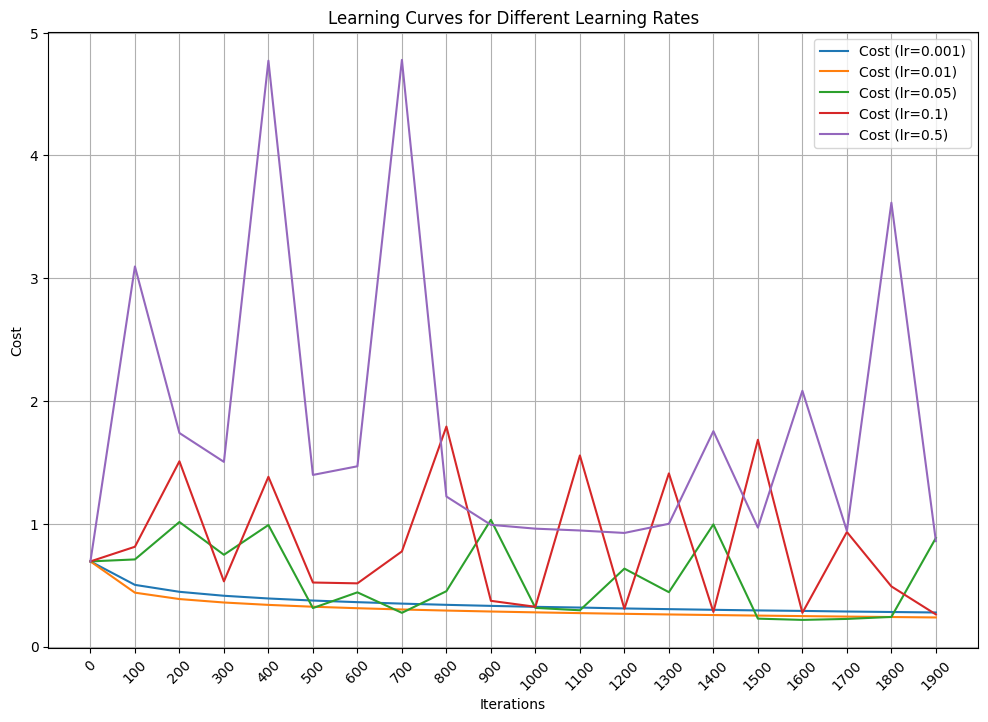

In [ ]:
# Define the learning rates you want to test
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

# Create a figure for the plots
plt.figure(figsize=(12, 8))

# Loop through each learning rate
for lr in learning_rates:
    # Run the model with the current learning rate
    d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=lr, print_cost=False)

    # Print accuracies in the desired format
    print(f"For Learning rate {lr}")
    print(f"train accuracy: {d['train_accuracy']:.2f} %")
    print(f"test accuracy: {d['test_accuracy']:.2f} %\n")  # Added newline for better separation

    # Plot the learning curve (cost)
    plt.plot(d['costs'], label=f'Cost (lr={lr})')

    # Use the training and test accuracy from the model's output
    train_accuracy = d['train_accuracy']
    test_accuracy = d['test_accuracy']

    # Add text annotations for training and test accuracy
    plt.annotate(f'Train Acc: {train_accuracy:.2f}%', xy=(len(d['costs']), train_accuracy),
                 xytext=(len(d['costs']) + 50, train_accuracy),
                 arrowprops=dict(arrowstyle='->', color='blue'), color='blue')
    plt.annotate(f'Test Acc: {test_accuracy:.2f}%', xy=(len(d['costs']), test_accuracy),
                 xytext=(len(d['costs']) + 50, test_accuracy),
                 arrowprops=dict(arrowstyle='->', color='orange'), color='orange')

# Add labels and title
plt.ylabel('Cost')  # Label for the y-axis
plt.xlabel('Iterations')  # Label for the x-axis
plt.title("Learning Curves for Different Learning Rates")  # Title of the plot
plt.xticks(ticks=range(0, len(d['costs'])), labels=[i * 100 for i in range(len(d['costs']))], rotation=45)
plt.grid()  # Optional: Add a grid for better readability
plt.legend()  # Show legend for different learning rates
plt.show()  # Display the plot